## Step 2: Calling make from inside Python

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rebuild():
    os.chdir("mathieu")
    os.system("make clean mathieu")
    os.chdir("..")

In [3]:
def build():
    os.chdir("mathieu")
    os.system("make mathieu")
    os.chdir("..")

## Step 3: Writing an init file from Python

In [4]:
def generate_input(N,q):
    if os.path.exists("mathieu/mathieu.init"):
        os.system("mv mathieu/mathieu.init mathieu/mathieu.init.bak")
    f = open("mathieu/mathieu.init","w")
    f.write("num_points {}\nq_index {}\nrun_name Mathieu_{}_{}".format(N,q,N,q))
    f.close

## Step 4: Calling the Mathieu program

In [5]:
def run_mathieu(N,q):
    build()
    generate_input(N,q)
    os.chdir("mathieu")
    os.system("./mathieu")
    os.chdir("..")
    

## Step 5: Calling the Mathieu program even more

In [6]:
def parsweep_mathieu(N):
    # Range of q values to test
    qRange = np.arange(0,42,2)
    for q in qRange:
        run_mathieu(N,q)

In [13]:
def plot_parsweep(N,nPlot):
    # Set range and space to store data
    qRange = np.arange(0,42,2)
    evals = np.zeros([len(qRange),nPlot])
    # Open files and extract relevant data
    for idx,q in enumerate(qRange):
        fname = 'mathieu/data/Mathieu_' + str(N) + '_' + str(q) + '.dat'
        data = np.loadtxt(fname)
        evals[idx,:] = np.sort(data[:,1])[0:nPlot]
    # Generate a plot of the eigenvalues as a function of the parameter q
    plt.figure(figsize=(12,8))
    plt.plot(qRange,evals,'-k')
    ######################### Draw a(q) and b(q)
    a_cords = [1+q-(1/8)*(q*q)-(1/64)*(q*q*q) for q in qRange]
    plt.plot(qRange, a_cords,linestyle="--",color="blue",label='a(q)');
    b_cords = [4-(q*q)*(1/12)+(5/13824)*(q*q*q*q) for q in qRange]
    plt.plot(qRange, b_cords,linestyle="--",color="green");
    ############################# Plot Details
    plt.xlabel("Paramater (q)");
    plt.ylabel("Eigenvalues");
    plt.title("Eigenvalues(Black) as a function of Parameter (q)");
    plt.xlim((0,40));
    plt.ylim((-70,20));
    plt.grid();
    #############################
    plt.savefig('Eigenvalues.png')
    plt.show()

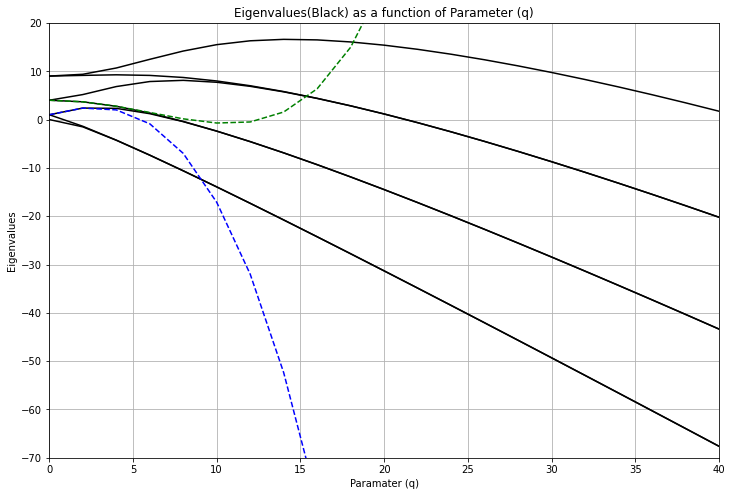

In [14]:
if __name__=="__main__":
    N = 101
    rebuild()
    parsweep_mathieu(N)
    plot_parsweep(N,7)